In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('once')

import matplotlib.pyplot as plt
%matplotlib inline

readpath='../../data/text_generation/raw/'
savepath='../../data/text_generation/interim/'

In [2]:
def vaderize(df, textfield):
    '''Compute the Vader polarity scores for a textfield.
    Returns scores and original dataframe.'''
    sid = SentimentIntensityAnalyzer()
    print('Estimating polarity scores for %d cases.' % len(df))    
    df['compound'] = df[textfield].apply(sid.polarity_scores)
    df_vader = pd.concat([df.drop(['compound'], axis=1), df['compound'].apply(pd.Series)], axis=1)
    print('Positive word count---{} '.format(df_vader.pos.sum()))
    print('Negative word count---{} '.format(df_vader.neg.sum()))
    print('Neutral word count---{} '.format(df_vader.neu.sum()))
    return df_vader

In [3]:
tda = pd.read_csv(readpath + 'TraitDescriptiveAdjectives.csv', usecols=['word'])
tdav = vaderize(tda, 'word')

Estimating polarity scores for 2818 cases.
Positive word count---307.0 
Negative word count---354.0 
Neutral word count---2157.0 


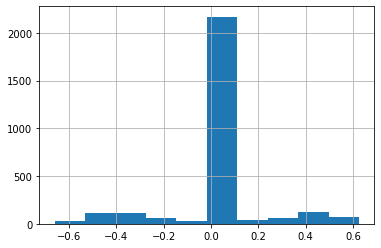

In [4]:
tdav.compound.hist()

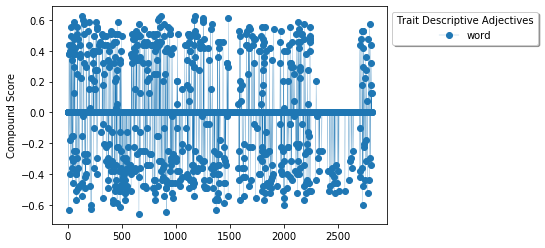

In [5]:
# Plot compound sentiment
tdav['compound'].plot(marker='o', linewidth= .2, label='word')
plt.ylabel('Compound Score')
# Plot line for average compound score
avg_tda = tdav['compound'].mean()
plt.hlines(avg_tda, 0, len(tdav), linewidth=.5, linestyle='dotted', color='green')
plt.legend(title="Trait Descriptive Adjectives", loc='center left', bbox_to_anchor=(1, .9), fancybox=True, shadow=True,)

In [6]:
neu = tdav.loc[tdav['compound']==0.0]
print(len(neu))
pos = tdav.loc[(tdav['compound']>0.0) & (tdav['compound']<=.4)]
print(len(pos))
vpos= tdav.loc[tdav['compound']>.4]
print(len(vpos))
neg = tdav.loc[(tdav['compound']<0.0) & (tdav['compound']>= -0.4)]
print(len(neg))
vneg = tdav.loc[tdav['compound']<-0.4]
print(len(vneg))

2157
120
187
190
164


In [7]:
neu = (tdav['compound']==0.0).values 
pos =  ((tdav['compound']>0.0) & (tdav['compound']<=.4)).values
vpos= (tdav['compound']>.4).values
neg = ((tdav['compound']<0.0) & (tdav['compound']>= -0.4)).values
vneg = (tdav['compound']<-0.4).values

tdav['sentiment_cat'] = 0
tdav['sentiment_cat'][vneg]=1
tdav['sentiment_cat'][neg]=2
tdav['sentiment_cat'][neu]=3
tdav['sentiment_cat'][pos]=4
tdav['sentiment_cat'][vpos]=5

/wgsprod/data/home/TRSSLLC/savrozenbaum/miniconda3/envs/greatsuccess2/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


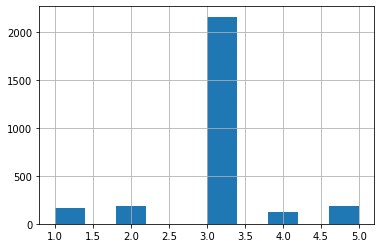

In [8]:
tdav.sentiment_cat.hist()

In [9]:
tdav.head()

,word,neg,neu,pos,compound,sentiment_cat
0,able,0.0,1.0,0.0,0.0,3
1,abnormal,0.0,1.0,0.0,0.0,3
2,abrasive,0.0,1.0,0.0,0.0,3
3,abrupt,0.0,1.0,0.0,0.0,3
4,absent-minded,0.0,1.0,0.0,0.0,3


In [10]:
tdav.to_csv(savepath+'TDA_Bank.csv',index=False)